In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:

from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [3]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [5]:
df.head()


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [7]:
df = df[~df['activity'].str.contains('Jogging|Sitting|Upstairs|Downstairs')]


In [10]:
mapping = {'Walking': 0, 'Standing': 1}
# 레이블 인코딩
df_copy = df.copy()  # 데이터프레임의 복사본 만들기
df_copy['ActivityEncoded'] = df_copy['activity'].map(mapping)
df = df_copy
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
597,33,Walking,49394992294000,0.844462,8.008764,2.792171,0
598,33,Walking,49395102310000,1.116869,8.621680,3.786457,0
599,33,Walking,49395202316000,-0.503953,16.657684,1.307553,0
600,33,Walking,49395302292000,4.794363,10.760075,-1.184970,0
601,33,Walking,49395412338000,-0.040861,9.234595,-0.694638,0
...,...,...,...,...,...,...,...
1095664,19,Standing,131477821443000,-4.990000,8.390000,-0.380000,1
1095665,19,Standing,131477861513000,-5.130000,8.240000,-0.420000,1
1095666,19,Standing,131477941499000,-4.560000,8.500000,-0.890000,1
1095667,19,Standing,131477981508000,-4.480000,8.540000,-1.080000,1


<Axes: xlabel='activity', ylabel='count'>

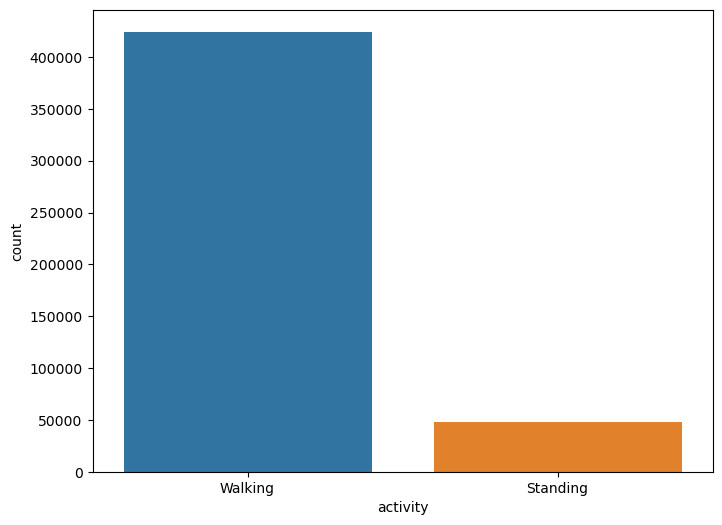

In [11]:

plt.figure(figsize=(8, 6))
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)
     

In [12]:
df.activity.value_counts()


activity
Walking     424397
Standing     48395
Name: count, dtype: int64

In [13]:

standing_data = df[df['activity'] == 'Standing']  # 'Standing' 행만 추출
num_repeats = 8  # 'Standing' 행을 몇 번 반복할지 결정
standing_data_repeated = pd.concat([standing_data] * num_repeats, ignore_index=True)  # 'Standing' 행을 복사하여 여러 번 반복

# 데이터프레임에 추가
df = pd.concat([df, standing_data_repeated], ignore_index=True)

# 결과 확인
print(df['activity'].value_counts())
     

activity
Standing    435555
Walking     424397
Name: count, dtype: int64


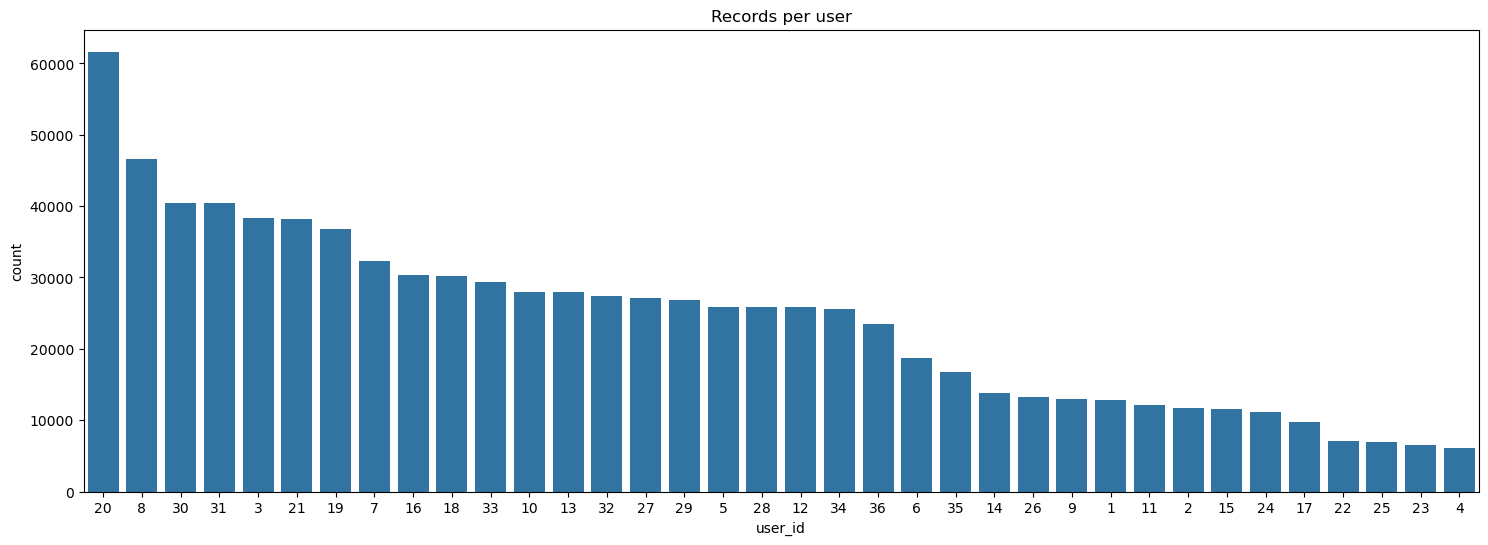

In [14]:

plt.figure(figsize=(18, 6))
sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

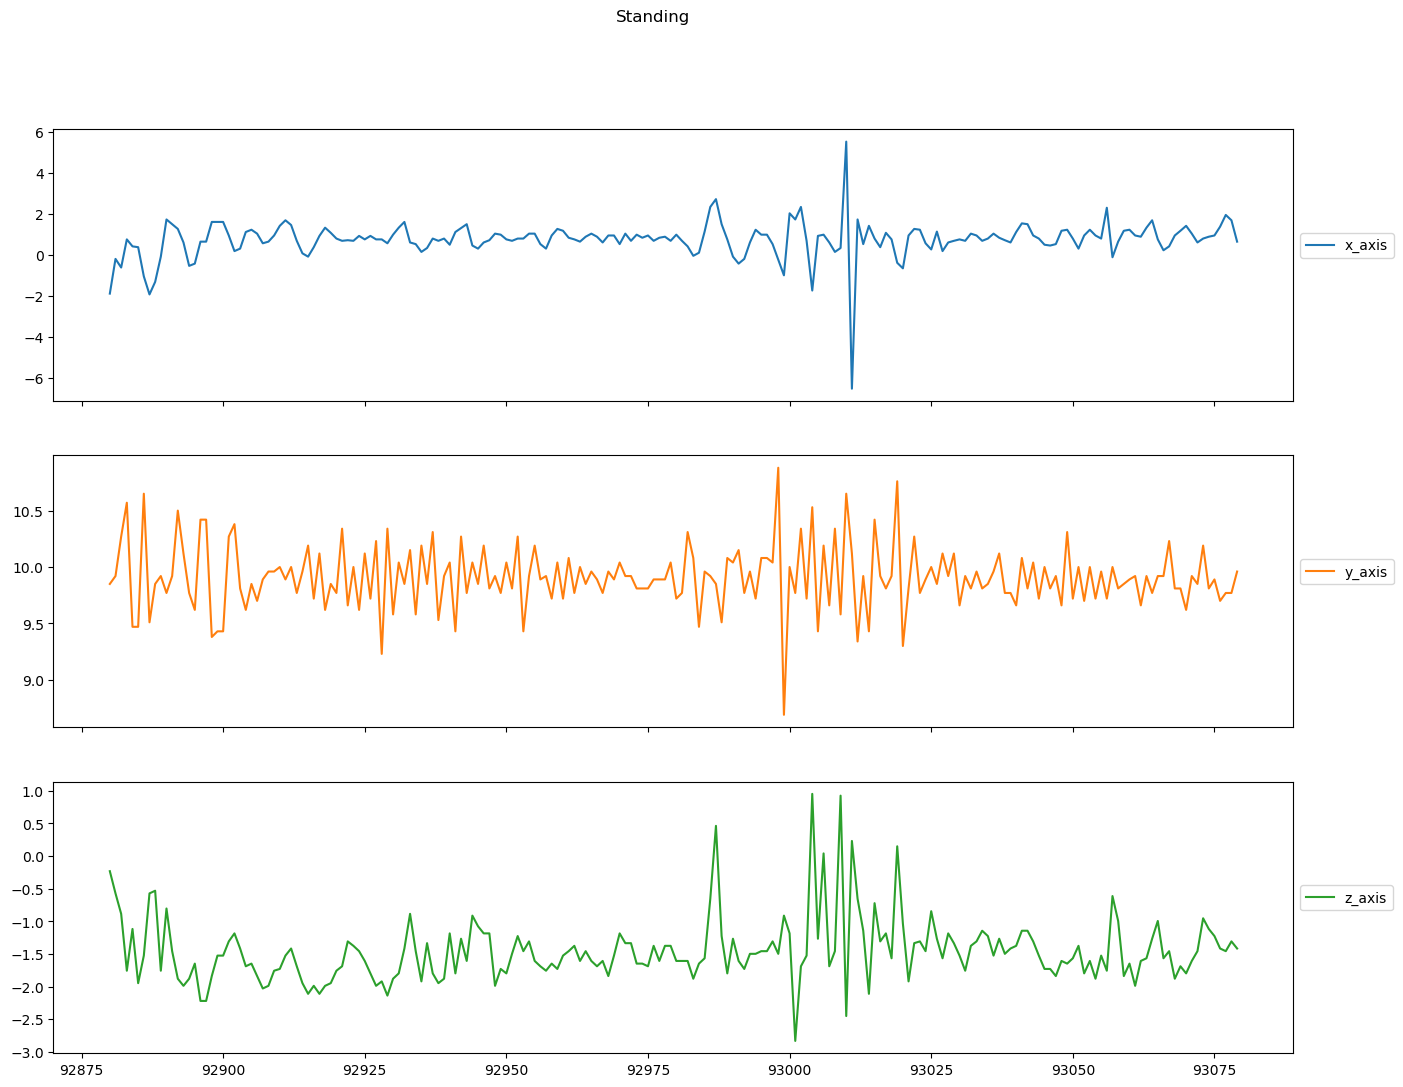

In [15]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Standing", df)
     

In [16]:

from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13756, 200, 3) (13756, 1)
(4299, 200, 3) (4299, 1)


In [17]:


from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
enc = enc.fit(y_train)

y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(13756, 200, 3) (13756, 2) (4299, 200, 3) (4299, 2)


In [18]:
#Epoch 10

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 2)

In [19]:

# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
     

Metal device set to: Apple M2 Pro


2024-03-22 02:33:33.285558: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-22 02:33:33.286030: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 64)           640       
                                                                 
 dropout (Dropout)           (None, 198, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6336)              0         
                                                                 
 dense (Dense)               (None, 128)               811136    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [20]:

# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)


Epoch 1/10


2024-03-22 02:33:39.064535: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-22 02:33:39.312008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.9623

2024-03-22 02:33:43.357781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 5s 23ms/step - loss: 0.2604 - accuracy: 0.9623 - val_loss: 0.0104 - val_accuracy: 0.9991
Epoch 2/10
108/108 [==============================] - 2s 14ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0109 - val_accuracy: 0.9991
Epoch 3/10
108/108 [==============================] - 2s 14ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0061 - val_accuracy: 0.9991
Epoch 4/10
108/108 [==============================] - 1s 14ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0091 - val_accuracy: 0.9991
Epoch 5/10
108/108 [==============================] - 1s 14ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 6/10
108/108 [==============================] - 1s 14ms/step - loss: 8.3918e-04 - accuracy: 0.9997 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 7/10
108/108 [==============================] - 1s 13ms/step - loss: 7.0344e-04 - accuracy: 0.9999 - val_loss: 0.0039 - val_accuracy: 0.9994
Ep

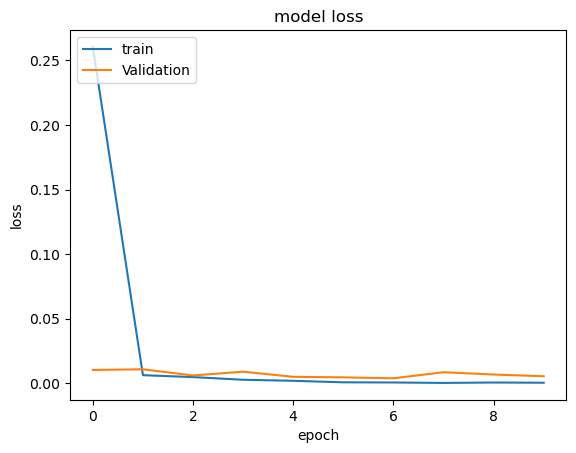

In [21]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

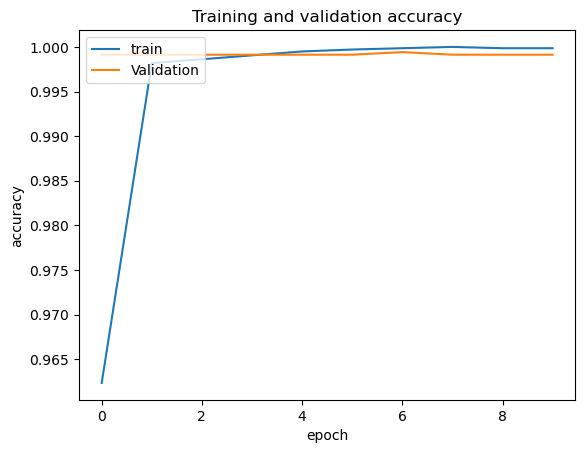

In [22]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

135/135 [==============================] - 0s 2ms/step
f1_score =  0.9981391399808514
0.9981391021167714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       1.00      1.00      1.00      2177

    accuracy                           1.00      4299
   macro avg       1.00      1.00      1.00      4299
weighted avg       1.00      1.00      1.00      4299



<Axes: >

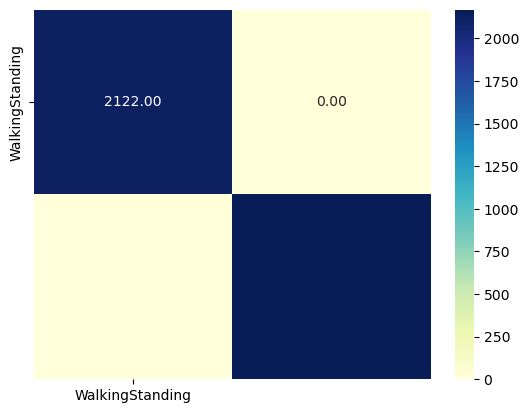

In [24]:
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking''Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [25]:

# Model 2
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 198, 64)           640       
                                                                 
 dropout_1 (Dropout)         (None, 198, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 97, 64)            12352     
                                                                 
 dropout_2 (Dropout)         (None, 97, 64)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 48, 64)           0         
 1D)                                                  

In [26]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)
     

Epoch 1/10


2024-03-22 02:34:59.160014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - ETA: 0s - loss: 0.5528 - accuracy: 0.9039

2024-03-22 02:35:01.562845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 3s 21ms/step - loss: 0.5528 - accuracy: 0.9039 - val_loss: 0.0348 - val_accuracy: 0.9956
Epoch 2/10
108/108 [==============================] - 2s 15ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.0107 - val_accuracy: 0.9985
Epoch 3/10
108/108 [==============================] - 2s 15ms/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.0086 - val_accuracy: 0.9988
Epoch 4/10
108/108 [==============================] - 2s 15ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0074 - val_accuracy: 0.9988
Epoch 5/10
108/108 [==============================] - 2s 16ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0056 - val_accuracy: 0.9994
Epoch 6/10
108/108 [==============================] - 2s 15ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9988
Epoch 7/10
108/108 [==============================] - 2s 15ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 8/10

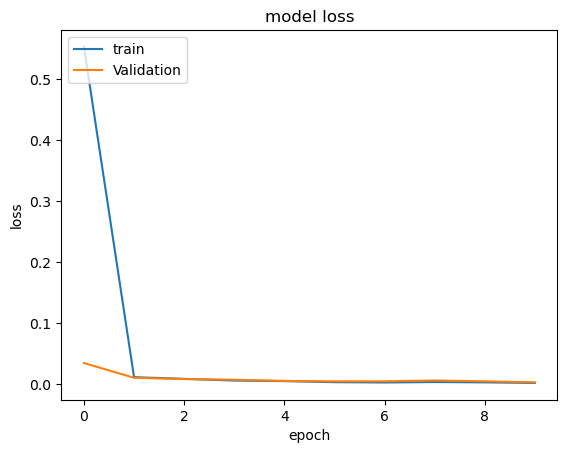

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

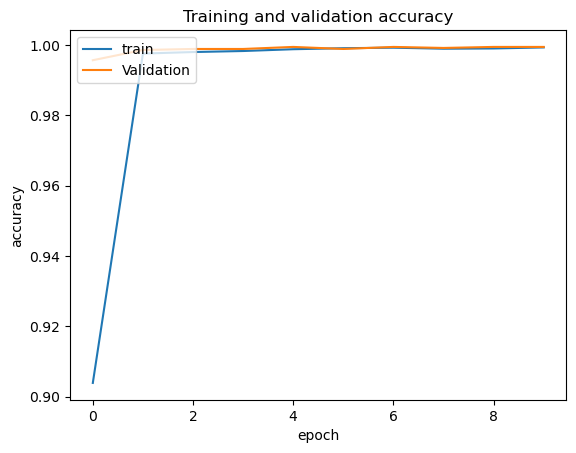

In [28]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

 55/135 [===========>..................] - ETA: 0s

2024-03-22 02:35:52.370598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


135/135 [==============================] - 0s 3ms/step
f1_score =  0.9993021653330896
0.9993021632937893
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       1.00      1.00      1.00      2177

    accuracy                           1.00      4299
   macro avg       1.00      1.00      1.00      4299
weighted avg       1.00      1.00      1.00      4299



<Axes: >

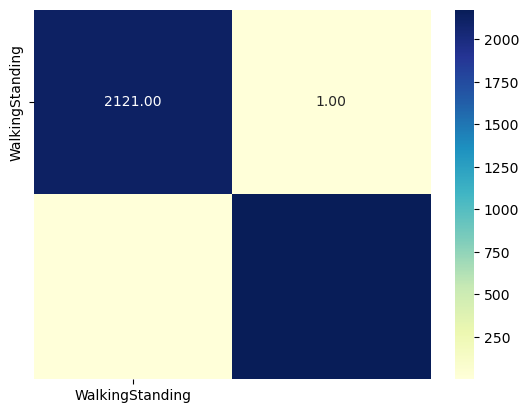

In [29]:


from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking''Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [30]:

# Model 3
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
     


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 198, 64)           640       
                                                                 
 dropout_3 (Dropout)         (None, 198, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 97, 64)            12352     
                                                                 
 dropout_4 (Dropout)         (None, 97, 64)            0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 48, 64)           0         
 1D)                                                  

In [31]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)
     

Epoch 1/10


2024-03-22 02:36:12.102869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - ETA: 0s - loss: 0.6599 - accuracy: 0.8753

2024-03-22 02:36:14.476378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 3s 21ms/step - loss: 0.6599 - accuracy: 0.8753 - val_loss: 0.0243 - val_accuracy: 0.9948
Epoch 2/10
108/108 [==============================] - 2s 16ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0184 - val_accuracy: 0.9974
Epoch 3/10
108/108 [==============================] - 2s 16ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0175 - val_accuracy: 0.9991
Epoch 4/10
108/108 [==============================] - 2s 16ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0146 - val_accuracy: 0.9994
Epoch 5/10
108/108 [==============================] - 2s 16ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0095 - val_accuracy: 0.9991
Epoch 6/10
108/108 [==============================] - 2s 16ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0105 - val_accuracy: 0.9994
Epoch 7/10
108/108 [==============================] - 2s 16ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0064 - val_accuracy: 0.9991
Epoch 8/10

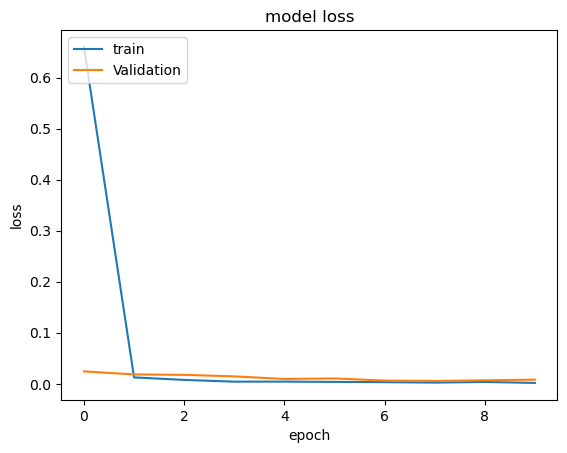

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

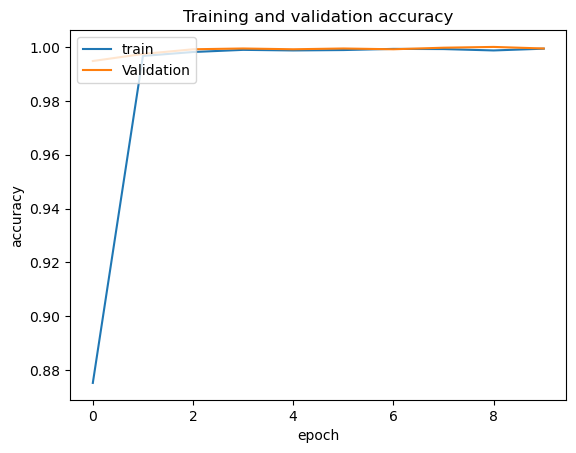

In [33]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

 52/135 [==========>...................] - ETA: 0s

2024-03-22 02:36:47.915580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


135/135 [==============================] - 0s 3ms/step
f1_score =  0.9995347781978915
0.9995347755291928
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       1.00      1.00      1.00      2177

    accuracy                           1.00      4299
   macro avg       1.00      1.00      1.00      4299
weighted avg       1.00      1.00      1.00      4299



<Axes: >

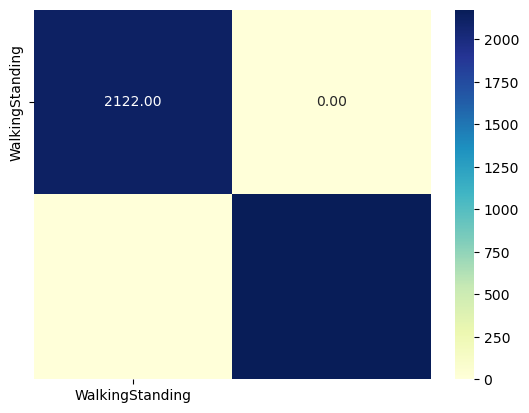

In [34]:


from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking''Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')